# Modelos de difusão

Os modelos de difusão podem ser utilizados para entender como doenças se espalham, como notícias ou boatos se propagam, como opiniões sobre determinados temas são formadas, ou como o consumo de determinados produtos ou serviços são adotados.

In [2]:
import networkx as nx
import numpy as np
from numpy . random import default_rng
import matplotlib . pyplot as plt

## Tamanho das componentes e imunidade

Note que se o processo de difusão inicia em um único vértice, ele só conseguirá contagiar os vértices que estão na mesma componente do nó inicial. 

Portanto, o processo de difusão só atingirá uma fração significativa dos nós se houver uma componente gigante. 

Deste modo, é importante estudar o comportamento dos tamanhos das componentes para o processo de difusão. 

Nesta seção, abordaremos o problema em que temos um indivíduo inicialmente infectado e queremos determinar o espalhamento desta doença na rede quando uma certa fração aleatória, $f$ , de indivíduos é imune a doença e, portanto, é removida da rede. 

Deste modo, o problema da difusão da doença, corresponde a saber se o indivíduo inicialmente infectado está em uma componente que contém uma fração considerável dos vértices, após a remoção dos indivíduos imunes.

### Exemplo

Considere uma rede de Erdös-Renyi com $n$ nós e uma probabilidade de ligação $p$.

A componente gigante não se formará somente se mais da metade da população for imunizada para $p = \frac{2}{(n-2)}$.

In [3]:
rng = default_rng()

M = 100 
V = 19 # número de simulações
n = 100000 # número de nodes
p = 2/(n-2) # probabilidade

In [5]:
f = np.linspace(0,0.9,V) # Return evenly spaced numbers over a specified interval.
Fcomp = np.zeros(V) # média dos fcomp

In [6]:
for v in range(V):
    fcomp = np.zeros(M)
    m = int(np.round(n*f[v],0)) # Round an array to the given number of decimals.
    for k in range(M):
        g = nx.fast_gnp_random_graph(n,p) # Returns a $G_{n,p}$ random graph, also known as an Erdős-Rényi.
        j = rng.choice(n,m,replace=False) # Generates a random sample from a given array
        g.remove_nodes_from(j)
        fcomp[k] = len(max(nx.connected_components(g),key=len))/n # Generate connected components.
    Fcomp[v] = np.mean(fcomp)
    print(v,Fcomp[v])


0 0.7967881
1 0.7288618000000001
2 0.6592379999999999
3 0.5876757
4 0.5133024
5 0.4364286
6 0.3574114
7 0.2745943
8 0.18761010000000003
9 0.0951335
10 0.0113229
11 0.0023927
12 0.0009912
13 0.0005337
14 0.0003155
15 0.00021260000000000002
16 0.0001425
17 9.810000000000003e-05
18 7e-05


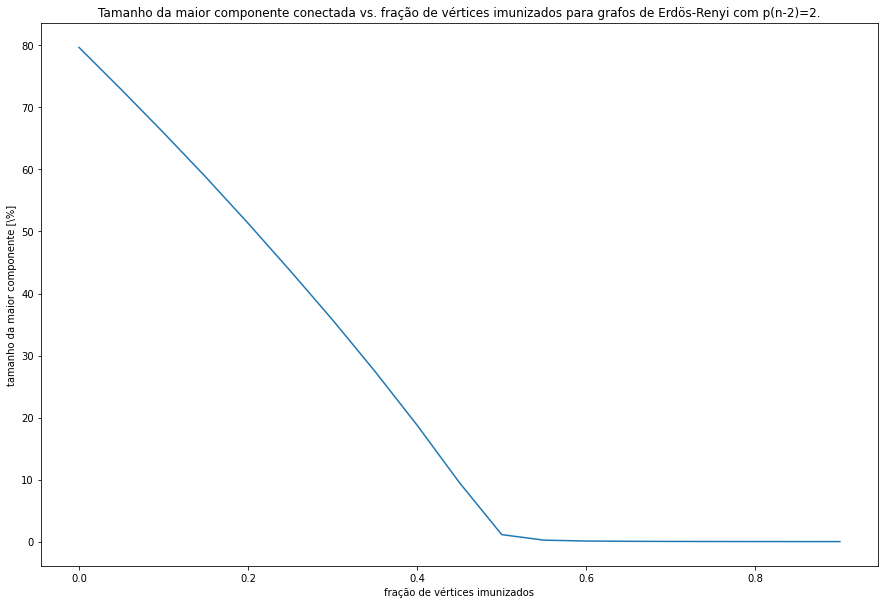

In [7]:
fig = plt.subplots(1,1,figsize=(15,10))

plt.plot(f,100*Fcomp)
plt.xlabel('fração de vértices imunizados')
plt.ylabel('tamanho da maior componente [\%]')
plt.title('Tamanho da maior componente conectada vs. fração de vértices imunizados para grafos de Erdös-Renyi com p(n-2)=2.')

plt.show()

Quando a fração de nós removidos(imunizados) supera $50\%$, o tamanho da maior componente conectada é menor, em média, a $1\%$ do tamanho total da rede.